# Prueba Técnica Arkon

Autor: Juan Carlos Hernández Rangel<br>
Desarrollo: 30-noviembre-2022

## Problema

En Los Ángeles existe un sistema compartido de bicicletas que brinda datos anónimos acerca
del uso del servicio. La tabla que se proporciona contiene el histórico de viajes que se han
realizado desde 2016 y contiene una columna que es de particular interés y que se buscará
analizar a más profundidad: Passholder_type. 

## Metodología

### Importar librerías

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yaml

from feature_engine import transformation as vt
from scipy.stats import zscore
from scipy.stats import skew, kurtosis

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Importar conjunto de datos

In [2]:
path_entrenamiento = '../Data/Train_Data_Clean.csv'
dataFrame = pd.read_csv(path_entrenamiento, low_memory=False)

In [3]:
with open(r'../Modelo/config.yml') as file:
    val = yaml.load(file, Loader=yaml.FullLoader)

### Selección de Características

#### Train Test Split

In [4]:
X = dataFrame.drop(val["variable_dependiente"], axis=1)
y = dataFrame[val["variable_dependiente"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

#### Modelo de Árboles Aleatorios

In [6]:
modelo_aa = RandomForestClassifier()
modelo_aa.fit(X_train, y_train)

RandomForestClassifier()

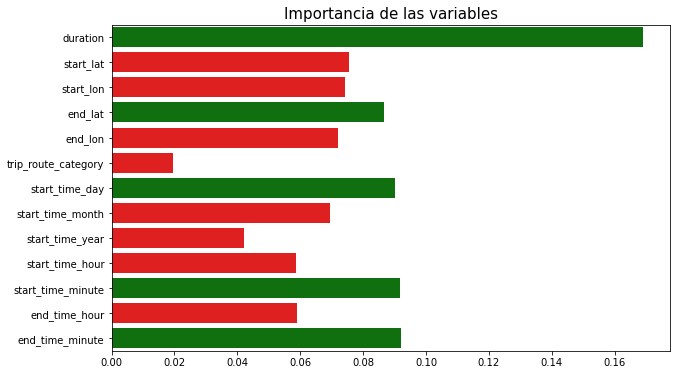

In [7]:
importancia = modelo_aa.feature_importances_
promedio_importancia = importancia.mean()
palette = ['green' if v >= promedio_importancia else 'red' for v in importancia]
plt.figure(figsize=(10, 6))
plt.title("Importancia de las variables", size=15)
ax = sns.barplot(x=importancia, y=X.columns, palette=palette);